<table width = 400 align="left" style="font-size:20px">
<tr>
    <td style="text-align:left"><b>Name:</b></td>
    <td style="text-align:left">Onmani Hemasree</td>
</tr>
<tr>
    <td  style="text-align:left"><b>Mail ID:</b></td>
    <td style="text-align:left">hodcp@mst.edu</td> 
</tr>
<tr>
    <td style="text-align:left"><b>Course:</b></td>
    <td style="text-align:left">CS 5402</td>
</tr>
<tr>
    <td style="text-align:left"><b>Assignment:</b></td>
    <td style="text-align:left">Homework 1</td>
</tr>
<tr>
    <td style="text-align:left"><b>Date:</b></td>
    <td style="text-align:left">06-10-2022</td>
</tr>
</table>

## Title

Data Mining vs Machine learning

In [30]:
# Imported for data management (dataframes)
import pandas as pd

# Imported to create word clouds
# This package needs part of anaconda and needs to be installed
# conda install -c conda-forge wordcloud
from wordcloud import WordCloud

# Imported to allow for the display of word clouds
import matplotlib.pyplot as plt

# Imported to allow for tokenization of words and get frequency count
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Imported to allow for Ordering of Dictionary data type
import collections

# Imported to allow for use do islice
from itertools import islice

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Concept Description:
We observed some overlap in our knowledge of Data Science, Data Mining, Machine Learning, and Artificial Intellegence during our class discussion on what is Data Mining. let's experiment on the overlapping definitions between Machine Learning and Data Mining, in particular, appears to have the some overlap, to the point where they appear to be synonyms. 

In order to gain a better grasp of the distinctions and similarities between Data Mining and Machine Learning, we will examine the differences in the vocabulary used to explain Data Mining and Machine learning by using word clouds and visualiztion in BarGraph representation.

## Data Collection: 
Data will be collected using the following procedure:
<ol>
<li>Google the search phrase “What is Data Mining” and separately “What is Machine Learning”.</li>
<li>Analyze the sites that provided the returned results and choose the first 15 that contain results for both search terms.</li>
<li>Browse the matching results pages for each search query from the 15 sites listed above, looking for a block of text beginning with "Data Mining is..." or "Machine Learning is..."</li>
<li>Record text blocks  as examples along with the link of the page, the search phrase, and the date when the results were pulled, and the name of the website the results were from.  If we did not find a text block then leave the data field blank. </li>
</ol>

The results for each search phrase are saved in one comma separated file per each search phrase.

## Example Description:
<b>Category</b>  
The example is recorded with the corresponding label that designates the search phrase that is searched.  The Category is a nominal data type.

<b>PullDate</b>  
The date when the search result was obtained.  The pull date is a date. Date is an interval data type.

<b>Website Name</b>  
The name of the site that was returned as a result. The source is a character string. The website name is a nominal data type.

<b>Website URL</b>  
The link that was returned as a result.  The link is a character string. The link is a nominal data type.

<b>Text</b>  
The text block that  was selected from the page is returned as a result of the search.  The text is a character string. The text is a nominal data type.

## Data Import and Wrangling: 
The results of each search are read into distinct dataframes from the corresponding comma separated value file (csv). To ensure that the data is read in as character strings, special care is taken. The collected data is presesnted below.

The text blocks from a search's results are concatenated into one long text string. 

"Na" was used to load the blank text blocks. Because WordCloud does not accept non-string data, we transform them back to empty text strings.

In [33]:
df_mining = pd.read_csv('DM1.csv',encoding = "ISO-8859-1", dtype=str)
df_learning = pd.read_csv('ML1.csv',encoding = "ISO-8859-1", dtype=str)
df_mining


,Category,Pull Date,website name,website url,Text
0,DataMining,06-12-2022,Investopedia,https://www.investopedia.com/terms/d/dataminin...,Data mining is a process used by companies to ...
1,DataMining,06-12-2022,SAS,https://www.sas.com/en_us/insights/analytics/d...,Data mining is the process of finding anomalie...
2,DataMining,06-12-2022,TechTarget,https://www.techtarget.com/searchbusinessanaly...,Data mining is the process of sorting through ...
3,DataMining,06-12-2022,Wikipedia,https://en.wikipedia.org/wiki/Data_mining,Data mining is the process of extracting and d...
4,DataMining,06-12-2022,IBM,https://www.ibm.com/cloud/learn/data-mining,"Data mining, also known as knowledge discovery..."
5,DataMining,06-12-2022,Bootcamp,https://bootcamp.pe.gatech.edu/blog/what-is-da...,Data mining is the process of analyzing dense ...
6,DataMining,06-12-2022,talend,https://www.talend.com/resources/what-is-data-...,Data mining is the process of analyzing massiv...
7,DataMining,06-12-2022,SAP,https://www.sap.com/insights/what-is-data-mini...,Data mining is the process of extracting usefu...
8,DataMining,06-12-2022,Britannica,https://www.britannica.com/technology/data-mining,"data mining, also called knowledge discovery i..."
9,DataMining,06-12-2022,gartner,https://www.gartner.com/en/information-technol...,Data mining is the process of discovering mean...


In [34]:
# Convert all Text attribute values to text strings.
str_mining = ''.join(list(df_mining['Text']))

# Replace any Na values with a blank text string.
str_learning = ''.join(list(df_learning['Text'].fillna('')))

## Exploratory Data Analysis:
First, we'll look at the texts relevant to the research "What is data mining... and what is Machine Learning" 

We'll take the search string and break it down into separate words. We'll remove all of the typical English stopwords by treating it like a bag of words. We collect a frequency count of all words once the stopwords are deleted, and then sort the words by frequency count.

In [35]:
# Tokenize the strings so we can get only words in the string
tokenizer = nltk.RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(str_mining)

stop_words = set(nltk.corpus.stopwords.words('english')) 

# Get dictionary of frequency counts of strings
wordlist  = nltk.FreqDist(words)

# Order the dictionary by frequency count
dist_mining = collections.OrderedDict(sorted(wordlist.items(), key=lambda t: t[1],reverse=True))
dist_learning = collections.OrderedDict(sorted(wordlist.items(), key=lambda t: t[1],reverse=True))

Now we visualize the word frequency distribution in bars representation.

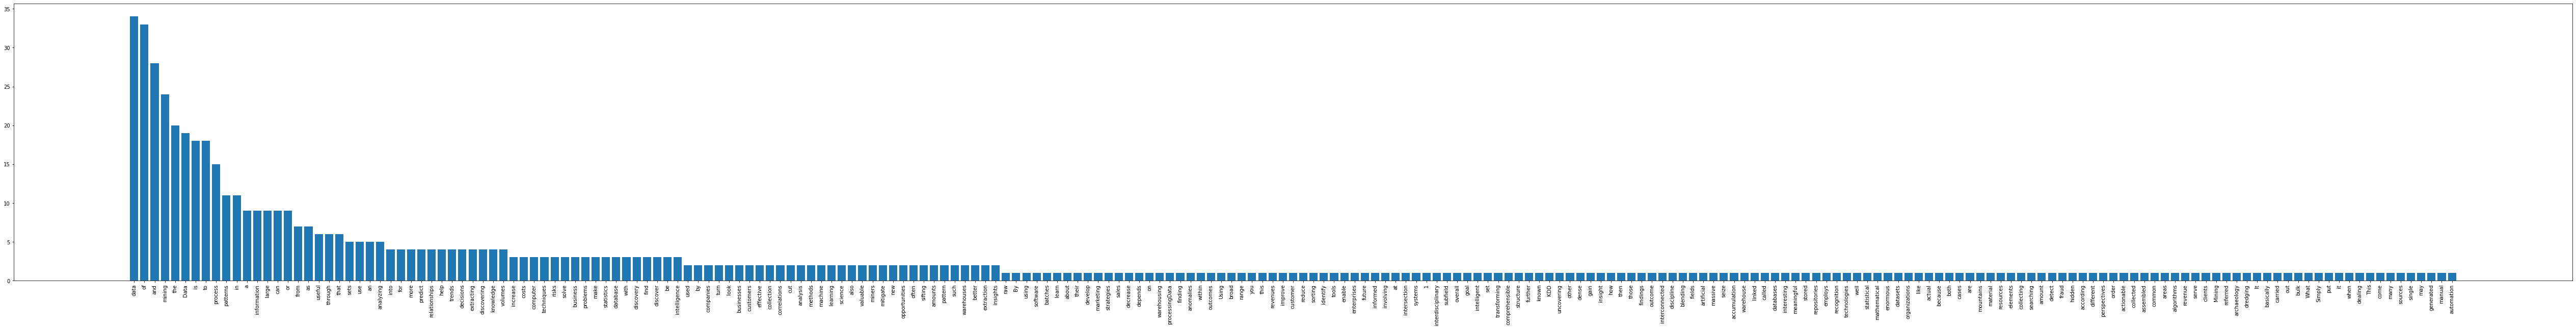

In [36]:
names = list(dist_mining.keys())
values = list(dist_mining.values())

f = plt.figure()
f.set_figwidth(90)
f.set_figheight(10)
bars = len(dist_mining)
x = range(bars)

plt.bar(x, values, tick_label=names)
plt.xticks(rotation='vertical')

plt.savefig('dist_mining.png')
plt.show()

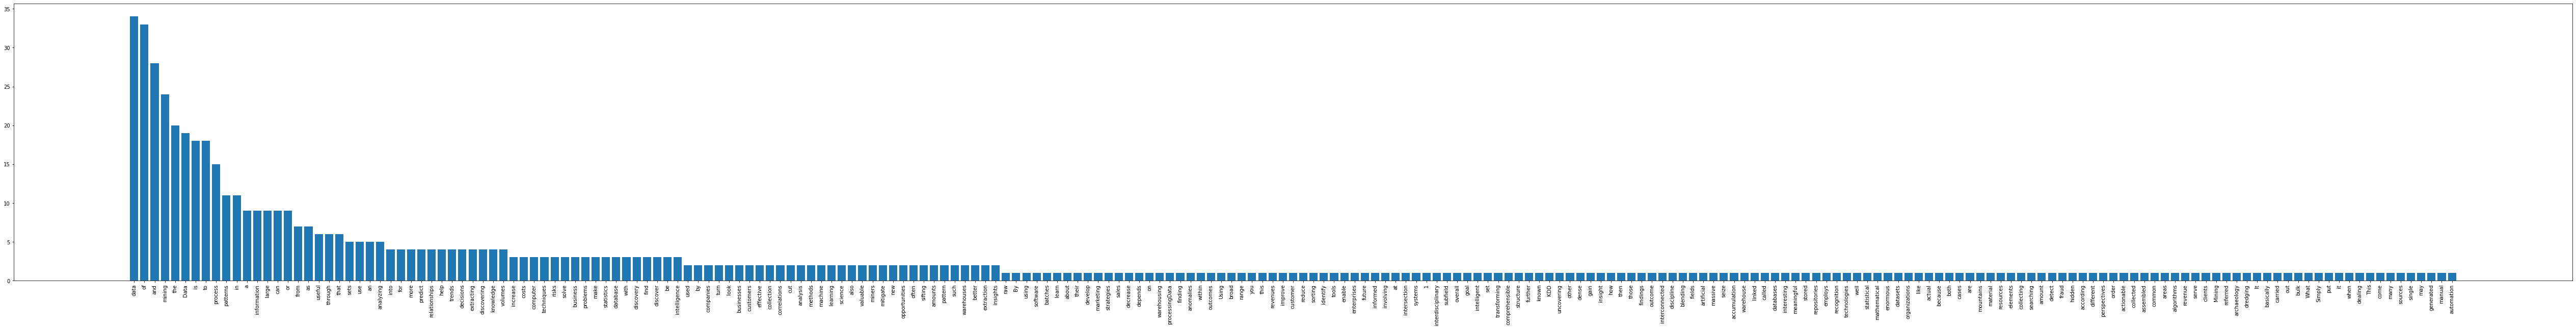

In [37]:
names = list(dist_learning.keys())
values = list(dist_learning.values())

f = plt.figure()
f.set_figwidth(90)
f.set_figheight(10)
bars = len(dist_learning)
x = range(bars)

plt.bar(x, values, tick_label=names)
plt.xticks(rotation='vertical')

plt.savefig('dist_learning.png')
plt.show()

In [38]:
range(len(dist_mining))

range(0, 227)

The distribution visualizes 798 words

## Word Clouds

Word Clouds are generated for each search result.

In [39]:
# Generate work Coulds for data mining and machine learning
wordcloud_mining = WordCloud().generate(str_mining)
wordcloud_learning = WordCloud().generate(str_learning)

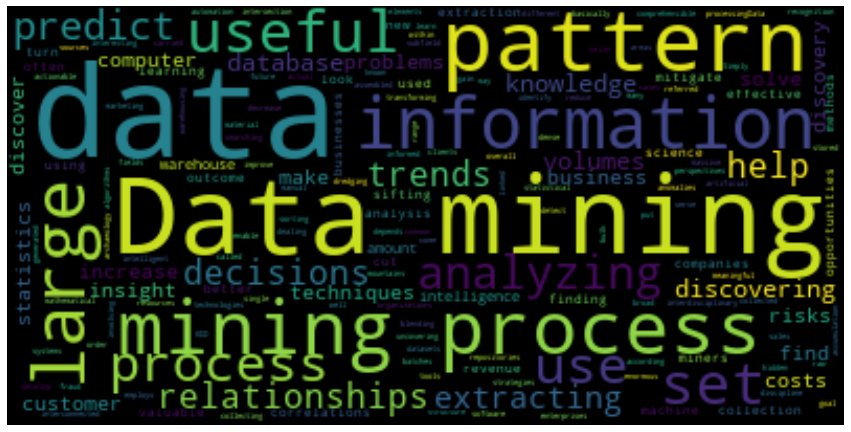

In [40]:
plt.figure(figsize=(15,8))
plt.axis('off')
plt.imshow(wordcloud_mining, interpolation='bilinear')

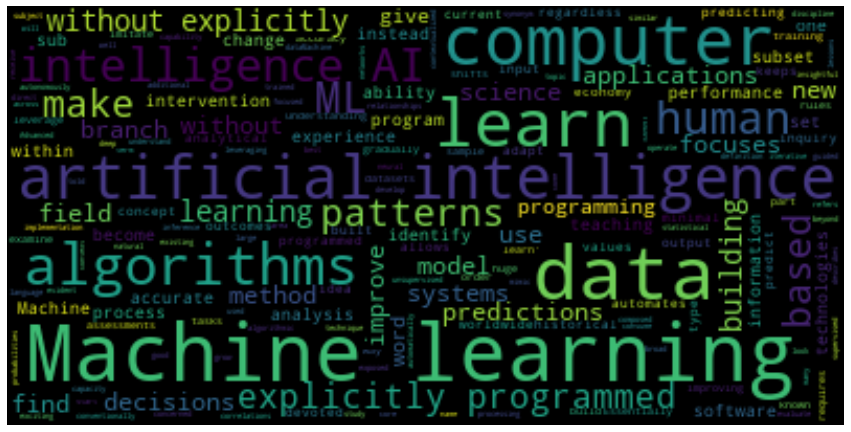

In [41]:
plt.figure(figsize=(15,8))
plt.axis('off')
plt.imshow(wordcloud_learning, interpolation='bilinear')

## Mining or Analytics:
Not applicable.

## Evaluation:
Not applicable.

## Results:
Data mining  involves finding the potentially useful, hidden and valid patterns from large amount of data. While, machine learning  involves new algorithms from the data as well as previous experience to train and make predictions from the models, both of them intersect at the point of having useful dataset but other than that they have various difference based upon the responsibilities, origin, Implementation, Nature, Application, Abstractions, Techniques and scope.

## References:
<uol>
<li>Anaconda Cloud. (2019). Wordcloud. Retrieved (2020, January 23) from</li> <a href="url">https://anaconda.org/conda-forge/wordcloud </a>

<li>Muller, Andreas. (2020). A little word cloud generator in python. Retrieved (2020, January 23) from</li> <a href="url">https://github.com/amueller/word_cloud </a>

<li>Pandas 0.25.3 Documentation. (2012). pandas.DataFrame.fillna. Retrieved (2020, January 23) from </li><a href="url">https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html</a>

<li>Stack Overflow. (2008). How do you change the size of figures drawn with matplotlib?. Retrieved (2020, January 23) from</li> <a href="url">https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib </a>

<li>stack exchange. what type of data type is date.</li><a href ="url"> https://stats.stackexchange.com/questions/332688/what-type-of-data-are-dates</a>
<li> An example on how to do this expreiment . what is data mining and data science. Professors notes <a href = "url">https://colab.research.google.com/drive/1z8YxY3XpVUqyFIO8fgNhSRHhtM6ELxoy#scrollTo=xEzN-d6RbR8z</a>
